In [4]:
import pandas as pd
import holidays

# Завантажуємо датасет
final_features_path = '../data/final_features_dataset.csv'
df = pd.read_csv(final_features_path, index_col='DateTime', parse_dates=True)

# Створюємо словник свят для Франції
french_holidays = holidays.France(years=range(2006, 2011))


df['is_holiday'] = df.index.map(lambda d: d.date() in french_holidays).astype(int)

print(f"Знайдено {df['is_holiday'].sum()} годин, що припадають на святкові дні.")


print("\nПриклад даних на День взяття Бастилії (14 липня 2008):")
display(df.loc['2008-07-14 10:00:00':'2008-07-14 15:00:00'])

# Перевіримо, чи правильно виставилась ознака 'is_holiday'
print("\nПеревірка значення 'is_holiday' для цього свята:")
display(df.loc['2008-07-14 10:00:00':'2008-07-14 15:00:00'][['is_holiday', 'Global_active_power']])

Знайдено 172 годин, що припадають на святкові дні.

Приклад даних на День взяття Бастилії (14 липня 2008):


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,...,Global_active_power_roll_std_3,Global_active_power_roll_mean_6,Global_active_power_roll_std_6,Global_active_power_roll_mean_12,Global_active_power_roll_std_12,Global_active_power_roll_mean_24,Global_active_power_roll_std_24,Global_active_power_roll_mean_168,Global_active_power_roll_std_168,is_holiday
DateTime,,,,,,,,,,,,,,,,,,,,,



Перевірка значення 'is_holiday' для цього свята:


,is_holiday,Global_active_power
DateTime,,


Перші 5 рядків з симульованими погодними даними:


,temperature,humidity,wind_speed
DateTime,,,
2006-12-24 15:00:00,1.845061,85.775188,4.544693
2006-12-24 16:00:00,3.482138,44.347747,8.570005
2006-12-25 11:00:00,3.679528,86.284472,7.477884
2006-12-25 12:00:00,5.943542,78.477735,3.966380
2006-12-25 13:00:00,4.179815,65.002419,4.257566


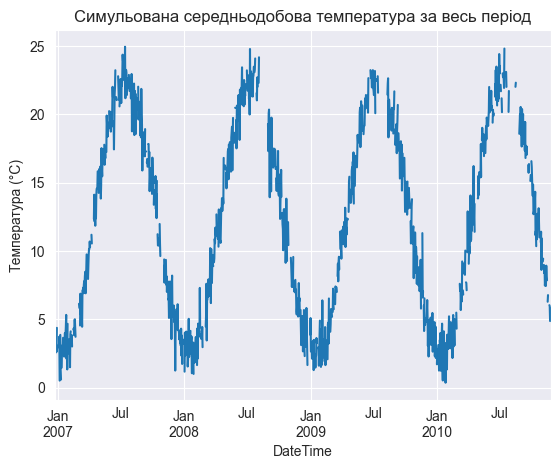

In [5]:
from matplotlib import pyplot as plt
import numpy as np

def generate_mock_weather_data(df_input):
    """
    Симулює реалістичні погодні дані для Франції.
    """
    df = df_input.copy()
    # Створюємо сезонну хвилю для температури (холодно взимку, тепло влітку)
    # df.index.dayofyear - це день року від 1 до 366
    base_temp = 12.5 # Середня температура в Парижі
    amplitude = 10 # Амплітуда коливань

    # Косинусна хвиля для імітації річних коливань температури
    df['temperature'] = base_temp - np.cos((df.index.dayofyear - 15) * 2 * np.pi / 365.25) * amplitude

    # Додаємо трохи випадкового шуму
    df['temperature'] += np.random.normal(0, 2, len(df))

    # Імітуємо вологість та швидкість вітру
    df['humidity'] = 70 + np.random.normal(0, 10, len(df))
    df['wind_speed'] = 5 + np.random.normal(0, 2, len(df))

    return df

# Генеруємо та приєднуємо погодні дані
df_with_weather = generate_mock_weather_data(df)

print("Перші 5 рядків з симульованими погодними даними:")
display(df_with_weather[['temperature', 'humidity', 'wind_speed']].head())

# Візуалізуємо симульовану температуру за рік
df_with_weather['temperature'].resample('D').mean().plot()
plt.title('Симульована середньодобова температура за весь період')
plt.ylabel('Температура (°C)')
plt.show()

In [6]:
# Зберігаємо фінальний DataFrame
output_path = '../data/dataset_for_modeling.csv'
df_with_weather.to_csv(output_path)

print(f"Фінальний датасет з усіма ознаками успішно збережено в: {output_path}")

Фінальний датасет з усіма ознаками успішно збережено в: ../data/dataset_for_modeling.csv
